In [114]:
#import packages

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
#set base directory and point to downloaded Meta Kaggle csv files
base_directory = "/Users/adarsh_23/CNS/Envisioning-Kaggle-main/Metadata"
extension = 'csv'
os.chdir(base_directory)
meta_files = glob.glob('*.{}'.format(extension))
print(meta_files, len(meta_files))


['TeamMemberships.csv', 'Competitions.csv', 'ForumMessageVotes.csv', 'Teams.csv', 'Datasets.csv', 'ForumMessages.csv', 'Users.csv', 'ForumTopics.csv', 'Forums.csv', 'ForumMessagesForTopTopics.csv', 'Submissions.csv', 'KernelVersionCompetitionSources.csv', 'Kernels.csv', 'targetKernels.csv'] 14


In [117]:
#read in dfs and declare variables to select competition of interest

comps_df = pd.read_csv(base_directory+'/Competitions.csv', parse_dates=['DeadlineDate'])

### This is the line that is changes to select a competition ###

comp_title = "HuBMAP + HPA - Hacking the Human Body"
comp_overview = comps_df[comps_df.Title==comp_title]
comp_id = comp_overview.iloc[0]['Id']
comp_forum_id = comp_overview.iloc[0]['ForumId']
comp_overview

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
5254,34547,hubmap-organ-segmentation,HuBMAP + HPA - Hacking the Human Body,Segment multi-organ functional tissue units,Research,1960467.0,3808.0,1,NaN,06/22/2022 18:34:11,...,False,False,USD,60000.0,3,1.0,True,1175,1517,39568


In [118]:
comp_overview.columns

Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'CompetitionTypeId', 'HostName', 'EnabledDate',
       'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate',
       'TeamMergerDeadlineDate', 'TeamModelDeadlineDate',
       'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified',
       'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard',
       'LeaderboardPercentage', 'LeaderboardDisplayFormat',
       'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName',
       'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax',
       'ValidationSetName', 'ValidationSetValue', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'EnableSubmissionModelHashes',
       'EnableSubmissionModelAttachments', 'RewardType', 'RewardQuantity',
       'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions'],
     

In [119]:
comp_overview[['EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate',
       'TeamMergerDeadlineDate', 'TeamModelDeadlineDate',
       'ModelSubmissionDeadlineDate']]

,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate
5254,06/22/2022 18:34:11,2022-09-22 23:59:00,09/15/2022 23:59:00,09/15/2022 23:59:00,10/12/2022 00:00:00,NaN


In [122]:
#important dates for Kaggle 2
important_dates_df = pd.DataFrame(data={'event_title': ['Begin 06/22/2022','Team Merger Deadline 09/15/2022', 'Deadline Date 09/22/2022','Winner Announcement Date 09/26/2022'], 'date': [pd.to_datetime('06/22/2022'), pd.to_datetime('09/15/2022'), pd.to_datetime('09/22/2022'), pd.to_datetime('09/26/2022')]})
important_dates_df

,event_title,date
0,Begin 06/22/2022,2022-06-22
1,Team Merger Deadline 09/15/2022,2022-09-15
2,Deadline Date 09/22/2022,2022-09-22
3,Winner Announcement Date 09/26/2022,2022-09-26


In [123]:
# inspect basic competition info
total_teams = comp_overview.TotalTeams
total_subs = comp_overview.TotalSubmissions

comp_overview

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
5254,34547,hubmap-organ-segmentation,HuBMAP + HPA - Hacking the Human Body,Segment multi-organ functional tissue units,Research,1960467.0,3808.0,1,NaN,06/22/2022 18:34:11,...,False,False,USD,60000.0,3,1.0,True,1175,1517,39568


In [124]:
# find all teams for this competition

teams_df = pd.read_csv(base_directory+'/Teams.csv', infer_datetime_format=True)

comp_teams_df = teams_df[teams_df.CompetitionId==comp_id].dropna(subset=['LastSubmissionDate'])
comp_teams_df['TeamId'] = comp_teams_df['Id']
#comp_teams_df = teams_df[teams_df.CompetitionId==comp_id]
#comp_teams_df.head(5)
team_ids_list = comp_teams_df.Id.unique().tolist()
len(team_ids_list)


/var/folders/hc/1stky0sd2_z9nqk66bk22rs80000gn/T/ipykernel_46186/1125018855.py:3: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  teams_df = pd.read_csv(base_directory+'/Teams.csv', infer_datetime_format=True)


1175

In [125]:
comp_teams_df.head(10)

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,TeamId
5436360,8800915,34547,NaN,sample_submission.csv,NaN,06/21/2022,27162604.0,27162604.0,True,NaN,NaN,NaN,NaN,8800915
5439339,8805826,34547,2132795.0,kaerururu,NaN,06/27/2022,27191942.0,27191942.0,False,NaN,NaN,882.0,928.0,8805826
5439354,8805846,34547,1107630.0,Naruhiko Nakanishi,NaN,09/20/2022,28168052.0,28168052.0,False,NaN,NaN,264.0,250.0,8805846
5439359,8805854,34547,6537187.0,Ravi Shah,NaN,09/05/2022,28022290.0,28022290.0,False,NaN,NaN,258.0,267.0,8805854
5439389,8805890,34547,10654180.0,The Devastator,NaN,08/02/2022,27594449.0,27594449.0,False,NaN,NaN,472.0,440.0,8805890
5439392,8805894,34547,4212496.0,forrato,NaN,09/08/2022,28042355.0,28042355.0,False,NaN,NaN,203.0,191.0,8805894
5439454,8805983,34547,1631982.0,Nikita Utin,NaN,07/25/2022,27303055.0,27303055.0,False,NaN,NaN,905.0,1002.0,8805983
5439478,8806020,34547,5447505.0,Mohammad Dehghan,NaN,07/04/2022,27304059.0,27304059.0,False,NaN,NaN,567.0,511.0,8806020
5439485,8806027,34547,4627242.0,Ishan Dutta,NaN,07/09/2022,27379344.0,27379344.0,False,NaN,NaN,709.0,744.0,8806027
5439505,8806056,34547,210994.0,Ayman Khalafallah,NaN,09/12/2022,28084490.0,28084490.0,False,NaN,NaN,494.0,610.0,8806056


In [126]:
#create df of submissions that are part of the competition

submissions_df = pd.read_csv(base_directory+'/Submissions.csv', infer_datetime_format=True)
bool_sub_by_team_in_comp = submissions_df.TeamId.isin(team_ids_list)
subs_in_comp_df = submissions_df[bool_sub_by_team_in_comp]

#filter out those after deadline

subs_in_comp_df = subs_in_comp_df[subs_in_comp_df.IsAfterDeadline==False]
subs_in_comp_df.head(5)

,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
10938022,27177301,1107630.0,8805846,99083601.0,06/23/2022,06/23/2022,False,0.00017,0.000178,0.00016,0.000168
10938023,27188747,1107630.0,8805846,99083601.0,06/24/2022,06/24/2022,False,0.00017,0.000178,0.00016,0.000168
10938286,27271946,3045170.0,8806499,99739796.0,07/01/2022,07/01/2022,False,0.64465,0.644654,0.61432,0.614323
10938287,27425049,3215961.0,8806782,100725048.0,07/13/2022,07/13/2022,False,0.56559,0.565597,0.51279,0.512796
10938288,27499221,3215961.0,8806782,101119599.0,07/18/2022,07/18/2022,False,0.66756,0.667563,0.64493,0.644932


In [127]:
c = pd.read_csv(base_directory+'/TeamMemberships.csv', infer_datetime_format=True).dropna(subset=['RequestDate'])
c.head(2)

,Id,TeamId,UserId,RequestDate
25,497916,469024,200660,02/06/2017
26,524121,494689,777876,02/20/2017


In [128]:
#plot number of teams over time

#get RequestDate by TeamId from TeamMemberships.csv
team_memberships_df = pd.read_csv(base_directory+'/TeamMemberships.csv', infer_datetime_format=True).dropna(subset=['RequestDate'])
team_memberships_df['RequestDate'] = pd.to_datetime(team_memberships_df.RequestDate)
bool_team_mem_in_comp = team_memberships_df.TeamId.isin(team_ids_list)
team_mem_in_comp = team_memberships_df[bool_team_mem_in_comp].set_index('TeamId').drop(columns=['Id', 'UserId']).sort_values(by='RequestDate')
team_mem_in_comp['TeamNum'] = range(1, len(team_mem_in_comp)+1)
team_mem_by_date = team_mem_in_comp.groupby('RequestDate')
teams_so_far_by_date_df = team_mem_by_date.max()
teams_so_far_by_date_df
#dates = list(team_mem_by_date.groups.keys())
#dates

,TeamNum
RequestDate,
2022-06-22,24
2022-06-23,110
2022-06-24,159
2022-06-25,185
2022-06-26,211
...,...
2022-09-11,1367
2022-09-12,1380
2022-09-13,1415


In [130]:
#add in reduced teams after team merger
#ended at 1175

teams_after_drop_df = pd.DataFrame(data={'RequestDate': [pd.to_datetime('09/16/2022'), pd.to_datetime('09/17/2022'), pd.to_datetime('09/18/2022'), pd.to_datetime('09/19/2022'), pd.to_datetime('09/20/2022'), pd.to_datetime('09/21/2022'), pd.to_datetime('09/22/2022')], 'TeamNum': [1175, 1175, 1175, 1175, 1175, 1175, 1175]})

teams_so_far_by_date_df.columns = [''.join(col) for col in teams_so_far_by_date_df.columns.values]
teams_so_far_by_date_df = teams_so_far_by_date_df.reset_index()
teams_so_far_by_date_df.sort_values(by=['RequestDate'])
teams_so_far_by_date_df = teams_so_far_by_date_df.append(teams_after_drop_df, ignore_index=True)

teams_so_far_by_date_df

/var/folders/hc/1stky0sd2_z9nqk66bk22rs80000gn/T/ipykernel_46186/3854587856.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teams_so_far_by_date_df = teams_so_far_by_date_df.append(teams_after_drop_df, ignore_index=True)


,index,RequestDate,TeamNum
0,0.0,2022-06-22,24
1,1.0,2022-06-23,110
2,2.0,2022-06-24,159
3,3.0,2022-06-25,185
4,4.0,2022-06-26,211
...,...,...,...
95,NaN,2022-09-18,1175
96,NaN,2022-09-19,1175
97,NaN,2022-09-20,1175
98,NaN,2022-09-21,1175


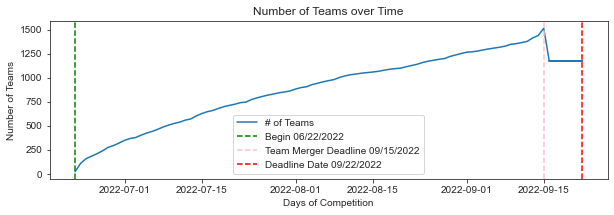

In [131]:
#plot Teams over Time
sns.set_style("ticks")
plt.figure(figsize=(10, 3))
plt.plot(teams_so_far_by_date_df.RequestDate, teams_so_far_by_date_df.TeamNum, label="# of Teams")
plt.title("Number of Teams over Time")
plt.xlabel("Days of Competition")
plt.ylabel("Number of Teams")

plt.draw()
# add vertical lines for critical dates
plt.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
#plt.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[1]['date'], color='pink', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[2]['date'], color='red', label=important_dates_df.iloc[2]['event_title'], linestyle='--')

plt.subplots_adjust(bottom=0.15)#adjusts plot so x label isn't cut off

plt.legend()

plt.savefig('Teams over Time.png')

plt.show()
plt.close()

In [132]:
#plot top scores over time

#aggregate subs_in_comp_df by SubmissionDate
subs_in_comp_df = subs_in_comp_df.groupby('SubmissionDate')

x = pd.to_datetime(list(subs_in_comp_df.groups.keys()))
y_public = subs_in_comp_df.max('PublicScoreFullPrecision')
y_private = subs_in_comp_df.max('PrivateScoreFullPrecision')

plt.show()
plt.close()

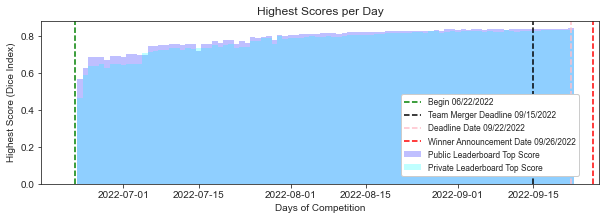

In [134]:
#plot max PublicScoreLeaderboardDisplay and PrivateScoreLeaderboardDisplay for each SubmissionDate

plt.figure(figsize=(10, 3))
plt.bar(x, list(y_public['PublicScoreLeaderboardDisplay']), label="Public Leaderboard Top Score", alpha=0.25, color='blue', 
       linewidth=0, width=1)
plt.bar(x, list(y_private['PrivateScoreLeaderboardDisplay']), label="Private Leaderboard Top Score", alpha=0.25, color='cyan',
       linewidth=0, width=1)

plt.title("Highest Scores per Day")
plt.xlabel("Days of Competition")
plt.ylabel("Highest Score (Dice Index)")

# add vertical lines for critical dates
plt.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')
plt.legend(loc=(.645,0.05), fontsize='small', framealpha=1)
plt.savefig('Highest Scores per Day Overlapping Bar.png')
plt.savefig('Highest Scores per Day Overlapping Bar.svg')
plt.show()
plt.close()

In [94]:
# need to add number of messages over time to plot of teams over time
forums_df = pd.read_csv(base_directory+'/Forums.csv', infer_datetime_format=True)
forums_topics_df = pd.read_csv(base_directory+'/ForumTopics.csv', infer_datetime_format=True)
forums_messages_df = pd.read_csv(base_directory+'/ForumMessages.csv', infer_datetime_format=True)
forums_df.head()

,Id,ParentForumId,Title
0,1,8.0,Predict HIV Progression
1,2,8.0,Forecast Eurovision Voting
2,3,8.0,World Cup 2010 - Take on the Quants
3,4,8.0,INFORMS Data Mining Contest 2010
4,5,NaN,Active Competitions


In [95]:
comp_forums_df = forums_df[forums_df.Id==comp_forum_id]
comp_forums_topics_df = forums_topics_df[forums_topics_df.ForumId==comp_forum_id]



In [96]:
#have to filter by forum topic
topic_ids = list(comp_forums_topics_df.Id.unique())
#topic_ids



In [97]:
comp_forums_messages_df = forums_messages_df[forums_messages_df.ForumTopicId.isin(topic_ids)].set_index('Id').drop(columns=['ForumTopicId', 'PostUserId', 'ReplyToForumMessageId', 'Message', 'Medal', 'MedalAwardDate']).sort_values(by='PostDate')
comp_forums_messages_df.head(5)



,PostDate
Id,
1829591,06/22/2022 18:28:51
1829592,06/22/2022 18:29:19
1829647,06/22/2022 19:23:08
1829658,06/22/2022 19:36:15
1829664,06/22/2022 19:43:37


In [98]:

comp_forums_messages_df['PostDate'] = pd.to_datetime(comp_forums_messages_df.PostDate)
comp_forums_messages_df = comp_forums_messages_df.sort_values(by=['PostDate'])
comp_forums_messages_df['MessageNum'] = range(1, len(comp_forums_messages_df)+1)
num_messages_by_date = comp_forums_messages_df.groupby('PostDate')
num_messages_by_date_df = num_messages_by_date.max().reset_index()
num_messages_by_date_df['PostDate'] = pd.to_datetime(num_messages_by_date_df.PostDate).dt.date
num_messages_by_date_df

,PostDate,MessageNum
0,2022-06-22,1
1,2022-06-22,2
2,2022-06-22,3
3,2022-06-22,4
4,2022-06-22,5
...,...,...
2144,2022-10-26,2145
2145,2022-10-29,2146
2146,2022-10-29,2147
2147,2022-11-04,2148


In [99]:
# x is PostDate
# y is cumulative number of messages
message_x = num_messages_by_date_df['MessageNum']
message_y = num_messages_by_date_df.PostDate
message_y

0       2022-06-22
1       2022-06-22
2       2022-06-22
3       2022-06-22
4       2022-06-22
           ...    
2144    2022-10-26
2145    2022-10-29
2146    2022-10-29
2147    2022-11-04
2148    2022-11-06
Name: PostDate, Length: 2149, dtype: object

In [100]:
import datetime
fdfnm = num_messages_by_date_df[num_messages_by_date_df['PostDate'] <= datetime.date(2022,10,1)]
message_x = fdfnm['MessageNum']
message_y = fdfnm.PostDate
message_y

0       2022-06-22
1       2022-06-22
2       2022-06-22
3       2022-06-22
4       2022-06-22
           ...    
2110    2022-10-01
2111    2022-10-01
2112    2022-10-01
2113    2022-10-01
2114    2022-10-01
Name: PostDate, Length: 2115, dtype: object

In [101]:
message_x

0          1
1          2
2          3
3          4
4          5
        ... 
2110    2111
2111    2112
2112    2113
2113    2114
2114    2115
Name: MessageNum, Length: 2115, dtype: int64

In [102]:
important_dates_df

,event_title,date
0,Begin 06/22/2022,2022-06-22
1,Team Merger Deadline 09/15/2022,2022-09-15
2,Deadline Date 09/22/2022,2022-09-22
3,Winner Announcement Date 09/26/2022,2022-09-26


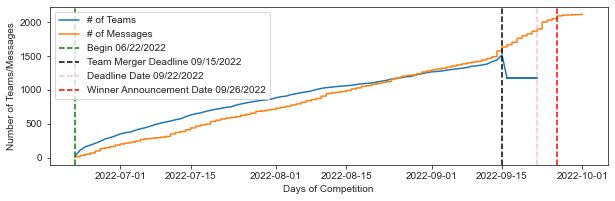

In [135]:
#plot Teams over Time
sns.set_style("ticks")
plt.figure(figsize=(10, 3))
plt.plot(teams_so_far_by_date_df.RequestDate, teams_so_far_by_date_df.TeamNum, label="# of Teams")
plt.plot(message_y, message_x, label="# of Messages")

#plt.title("Number of Teams and Messages over Time")
plt.xlabel("Days of Competition")
plt.ylabel("Number of Teams/Messages")
#plt.xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
plt.draw()
# add vertical lines for critical dates
plt.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')
#plt.axvline(x=important_dates_df.iloc[2]['date'], color='red', label=important_dates_df.iloc[2]['event_title'], linestyle='--')

plt.subplots_adjust(bottom=0.15)#adjusts plot so x label isn't cut off

plt.legend()

plt.savefig('Teams and Messages over Time.png')
plt.savefig('Teams and Messages over Time.svg')

plt.show()

In [104]:
type(x)
#x = pd.to_datetime(list(subs_in_comp_df.groups.keys()))
list(subs_in_comp_df.groups.keys())

['06/21/2022',
 '06/23/2022',
 '06/24/2022',
 '06/25/2022',
 '06/26/2022',
 '06/27/2022',
 '06/28/2022',
 '06/29/2022',
 '06/30/2022',
 '07/01/2022',
 '07/02/2022',
 '07/03/2022',
 '07/04/2022',
 '07/05/2022',
 '07/06/2022',
 '07/07/2022',
 '07/08/2022',
 '07/09/2022',
 '07/10/2022',
 '07/11/2022',
 '07/12/2022',
 '07/13/2022',
 '07/14/2022',
 '07/15/2022',
 '07/16/2022',
 '07/17/2022',
 '07/18/2022',
 '07/19/2022',
 '07/20/2022',
 '07/21/2022',
 '07/22/2022',
 '07/23/2022',
 '07/24/2022',
 '07/25/2022',
 '07/26/2022',
 '07/27/2022',
 '07/28/2022',
 '07/29/2022',
 '07/30/2022',
 '07/31/2022',
 '08/01/2022',
 '08/02/2022',
 '08/03/2022',
 '08/04/2022',
 '08/05/2022',
 '08/06/2022',
 '08/07/2022',
 '08/08/2022',
 '08/09/2022',
 '08/10/2022',
 '08/11/2022',
 '08/12/2022',
 '08/13/2022',
 '08/14/2022',
 '08/15/2022',
 '08/16/2022',
 '08/17/2022',
 '08/18/2022',
 '08/19/2022',
 '08/20/2022',
 '08/21/2022',
 '08/22/2022',
 '08/23/2022',
 '08/24/2022',
 '08/25/2022',
 '08/26/2022',
 '08/27/20

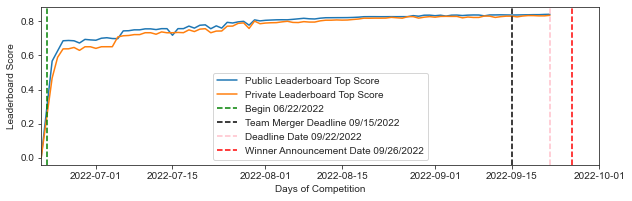

In [136]:
#plot Teams over Time
sns.set_style("ticks")
plt.figure(figsize=(10, 3))
#plt.plot(teams_so_far_by_date_df.RequestDate, teams_so_far_by_date_df.TeamNum, label="# of Teams")
#plt.plot(message_y, message_x, label="# of Messages",color='white')
plt.plot(x, list(y_public['PublicScoreLeaderboardDisplay']), label="Public Leaderboard Top Score")
plt.plot(x, list(y_private['PrivateScoreLeaderboardDisplay']), label="Private Leaderboard Top Score")


#plt.title("Number of Teams and Messages over Time")
plt.xlabel("Days of Competition")
plt.ylabel("Leaderboard Score")
plt.xlim([datetime.date(2022, 6, 21), datetime.date(2022, 10, 1)])
#plt.xlim(['06/21/2022', '10/01/2022'])
plt.draw()
# add vertical lines for critical dates
plt.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')
#plt.axvline(x=important_dates_df.iloc[2]['date'], color='red', label=important_dates_df.iloc[2]['event_title'], linestyle='--')

plt.subplots_adjust(bottom=0.15)#adjusts plot so x label isn't cut off

plt.legend()

plt.savefig('Teams and Messages over Time two.png')
plt.savefig('Teams and Messages over Time two.svg')

plt.show()

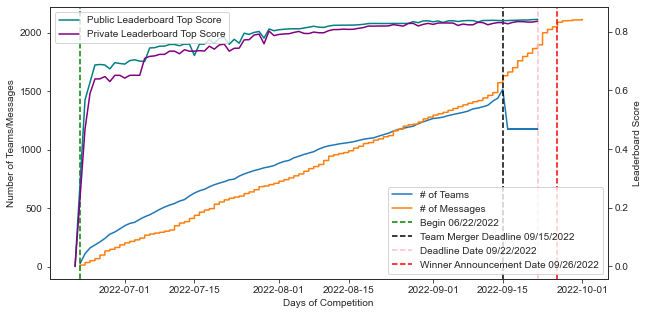

In [137]:
#plot Teams over Time
# Creating figure
fig = plt.figure(figsize=(10,5))
# Plotting dataset_2
ax = fig.add_subplot(111)
sns.set_style("ticks")
#plt.figure(figsize=(10, 3))
ax.plot(teams_so_far_by_date_df.RequestDate, teams_so_far_by_date_df.TeamNum, label="# of Teams")
ax.plot(message_y, message_x, label="# of Messages")
#plt.plot(x, list(y_public['PublicScoreLeaderboardDisplay']), label="Public Leaderboard Top Score", color='purple')
#plt.plot(x, list(y_private['PrivateScoreLeaderboardDisplay']), label="Private Leaderboard Top Score", color='brown')
# Creating Twin axes for dataset_1
ax2 = ax.twinx()
#ax2.plot(x, dataset_1, '-r', label='dataset_1')
ax2.plot(x, list(y_public['PublicScoreLeaderboardDisplay']), label="Public Leaderboard Top Score",color = 'teal')
ax2.plot(x, list(y_private['PrivateScoreLeaderboardDisplay']), label="Private Leaderboard Top Score",color = 'purple')

#plt.title("Number of Teams and Messages over Time")
ax.set_xlabel("Days of Competition")
ax.set_ylabel("Number of Teams/Messages")
ax2.set_ylabel("Leaderboard Score")


# add vertical lines for critical dates
ax.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
ax.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
ax.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
ax.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')
#plt.axvline(x=important_dates_df.iloc[2]['date'], color='red', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
#plt.draw()
#plt.subplots_adjust(bottom=0.15)#adjusts plot so x label isn't cut off

ax.legend(loc=4)
ax2.legend(loc=2)
#plt.legend()

plt.savefig('second_twice.png')
plt.savefig('second_twice.svg')

plt.show()

In [107]:
## next 
df = pd.read_csv(base_directory+'/Competitions.csv', parse_dates=['DeadlineDate'])
df.head(2)

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,1,NaN,04/07/2010 07:57:43,...,False,False,USD,1000.0,1,1.0,False,22,25,22
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1.0,NaN,1,NaN,04/27/2010 21:29:09,...,False,False,USD,500.0,1,1.0,True,107,116,855


In [108]:
df = df.drop_duplicates()
df['HostSegmentTitle'].value_counts()

InClass            5033
Featured            223
Research            146
Playground           97
Recruitment          17
Prospect              7
Getting Started       6
GE Quests             5
Name: HostSegmentTitle, dtype: int64

In [109]:
df.columns

Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'CompetitionTypeId', 'HostName', 'EnabledDate',
       'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate',
       'TeamMergerDeadlineDate', 'TeamModelDeadlineDate',
       'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified',
       'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard',
       'LeaderboardPercentage', 'LeaderboardDisplayFormat',
       'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName',
       'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax',
       'ValidationSetName', 'ValidationSetValue', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'EnableSubmissionModelHashes',
       'EnableSubmissionModelAttachments', 'RewardType', 'RewardQuantity',
       'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions'],
     

In [110]:
df['NumPrizes'].value_counts()

1     4682
0      499
3      238
5       51
4       21
10      15
2       11
6        5
7        5
8        3
13       2
9        1
12       1
Name: NumPrizes, dtype: int64

In [111]:
df['CompetitionTypeId'].value_counts()

1    5533
2       1
Name: CompetitionTypeId, dtype: int64

In [39]:
df['RewardType'].value_counts()

Knowledge    392
USD          343
Swag          51
Jobs          14
Kudos         10
Prizes         6
EUR            1
Name: RewardType, dtype: int64